In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service

In [46]:
driver = webdriver.Chrome(service=Service("../driver/chromedriver-linux64/chromedriver"))
driver.get("https://www.selenium.dev/")

In [5]:
driver.close()

In [7]:
driver.current_url

'https://www.selenium.dev/'

In [10]:
driver.execute_script("window.scrollTo(0, document.body.scrollHeight)")

#document.body.scrollHeight는 스크롤 가능한 페이지 높이 상수인듯 함.

In [11]:
driver.execute_script("window.scrollTo(0,0)")
#맨위로 스크롤

In [13]:
#특정 위치로 이동하기 위해서는 개발자 툴로 확인해봐야됨.
#<div class="d-flex justify-content-center p-5 td-box--100"><h2 class="selenium">News</h2></div>
#공백은 채워주어야함 .으로 바꾸기

In [17]:
#클래스를 찾은 다음

from selenium.webdriver.common.by import By

element = driver.find_element(By.CLASS_NAME, "d-flex.justify-content-center.p-5.td-box--100")

In [18]:
#확인

In [19]:
print(element.get_attribute('innerHTML'))

#div안의 HTML을 가져옴.

<h2 class="selenium">News</h2>


In [21]:
child = element.find_element(By.CLASS_NAME, "selenium")
print(child.text)

News


In [23]:
driver.execute_script("arguments[0].scrollIntoView(false);", child)

In [27]:
#스샷찍기
driver.save_screenshot("../data/image_01.png")

True

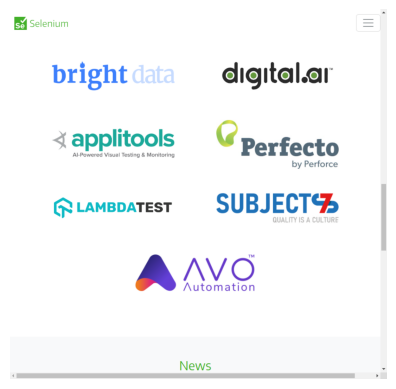

In [28]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

image = mpimg.imread("../data/image_01.png")
plt.imshow(image)
plt.axis("off")
plt.show()

In [29]:
#Xpath 는 상대경로
#Full XPATH 는 절대경로
#개발자 툴에서 copy - copyXPATH

In [47]:
driver.set_window_size(1440, 1080)
driver.maximize_window()

#크롤링할 때 사이즈를 잘 맞춰주어야함. 아래코드를 사용하면 전체화면으로 바꿔줌.

In [48]:
doc_link = driver.find_element(By.XPATH, '''//*[@id="main_navbar"]/ul/li[3]/a''')
doc_link.click()

In [44]:
driver.close()

In [49]:

doc_link = driver.find_element(By.XPATH, '''//*[@id="docsearch-1"]/button''')
doc_link.click()

In [55]:
from selenium.webdriver.common.keys import Keys

search_doc = driver.find_element(By.CSS_SELECTOR, '#docsearch-input')
search_doc.send_keys('find elements')
search_doc.send_keys('find elements')
search_doc.send_keys(Keys.CONTROL, 'a', Keys.BACK_SPACE)
search_doc.send_keys('find elements')
search_doc.send_keys(Keys.ENTER)

In [61]:
python_tab = driver.find_element(By.ID, "tabs-09-02-tab")
driver.execute_script("arguments[0].scrollIntoView(false);", python_tab)

In [62]:
python_tab.click()

In [64]:
python_panel = driver.find_element(By.ID, "tabs-09-02")
python_code = python_panel.find_element(By.TAG_NAME, "code")

print(python_code.text)

from selenium import webdriver
from selenium.webdriver.common.by import By

driver = webdriver.Chrome()
driver.get("https://www.example.com")

    # Get element with tag name 'div'
element = driver.find_element(By.TAG_NAME, 'div')

    # Get all the elements available with tag name 'p'
elements = element.find_elements(By.TAG_NAME, 'p')
for e in elements:
    print(e.text)
  


In [69]:
driver.back()#이전페이지로 이동
driver.forward()#앞으로 이동
driver.refresh()#새로고침
driver.back()

In [71]:
menu = driver.find_element(By.ID, "main_navbar")

li_list = menu.find_elements(By.TAG_NAME, "li") #elements는 해당하는 조건을 모두 찾는것이고 element는 맨 처음거만 선택
for idx, li in enumerate(li_list):
    print("[" + str(idx) + "] =========================================")
    print(li.get_attribute('innerHTML'))

[0] =========================================
<a class="nav-link dropdown-toggle" href="#" id="navbarDropdown" role="button" data-bs-toggle="dropdown" aria-haspopup="true" aria-expanded="false">About</a><div class="dropdown-menu" aria-labelledby="navbarDropdown"><a class="dropdown-item" href="/about">About Selenium</a>
<a class="dropdown-item" href="/project">Structure and Governance</a>
<a class="dropdown-item" href="/events">Events</a>
<a class="dropdown-item" href="/ecosystem">Ecosystem</a>
<a class="dropdown-item" href="/history">History</a>
<a class="dropdown-item" href="/getinvolved">Get Involved</a>
<a class="dropdown-item" href="/sponsors">Sponsors</a>
<a class="dropdown-item" href="/sponsor">Sponsor Us</a></div>
[1] =========================================
<a class="nav-link" href="/downloads"><span>Downloads</span></a>
[2] =========================================
<a class="nav-link" href="/documentation"><span>Documentation</span></a>
[3] ===================================

In [76]:
about = li_list[0]

#print(li_list)
#print(about)
about.click()
link_list = about.find_elements(By.CLASS_NAME, "dropdown-item")
for link in link_list:
    print(link.text)

About Selenium
Structure and Governance
Events
Ecosystem
History
Get Involved
Sponsors
Sponsor Us


In [77]:
histroy = about.find_element(By.LINK_TEXT, "History")
print(histroy.text)

History


In [78]:
histroy.click()

In [79]:
driver.back()

In [80]:
#여러가지를 연속으로 하는 것 -> ActionChains

from selenium.webdriver import ActionChains
import time

actions = ActionChains(driver)
actions.click(about)
actions.click(histroy)
actions.perform()

In [81]:
driver.back()

In [82]:
about = li_list[0]
link_list = about.find_elements(By.CLASS_NAME, "dropdown-item")
for link in link_list:
    print(link.get_attribute("href"))

https://www.selenium.dev/about
https://www.selenium.dev/project
https://www.selenium.dev/events
https://www.selenium.dev/ecosystem
https://www.selenium.dev/history
https://www.selenium.dev/getinvolved
https://www.selenium.dev/sponsors
https://www.selenium.dev/sponsor


In [83]:
from bs4 import BeautifulSoup

page = driver.page_source
soup = BeautifulSoup(page, "html.parser")
print(soup.prettify())

<html class="no-js" itemscope="" itemtype="http://schema.org/WebPage" lang="en">
 <head>
  <meta content="Hugo 0.125.4" name="generator"/>
  <meta charset="utf-8"/>
  <meta content="width=device-width,initial-scale=1,shrink-to-fit=no" name="viewport"/>
  <link href="https://www.selenium.dev/index.xml" rel="alternate" type="application/rss+xml"/>
  <meta content="index, follow" name="robots"/>
  <link href="/favicons/favicon.ico" rel="shortcut icon"/>
  <link href="/favicons/apple-touch-icon-180x180.png" rel="apple-touch-icon" sizes="180x180"/>
  <link href="/favicons/favicon-16x16.png" rel="icon" sizes="16x16" type="image/png"/>
  <link href="/favicons/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/>
  <link href="/favicons/android-36x36.png" rel="icon" sizes="36x36" type="image/png"/>
  <link href="/favicons/android-48x48.png" rel="icon" sizes="48x48" type="image/png"/>
  <link href="/favicons/android-72x72.png" rel="icon" sizes="72x72" type="image/png"/>
  <link href="/

In [84]:
driver.quit()

In [85]:
#close()와 quit()의 차이

#close는 현재 보고있는 탭만, quit는 나머지탭들 모두 다 종료